In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install library

In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/')

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 15.2 MB/s 
     |████████████████████████████████| 26.1 MB 2.8 MB/s 
     |████████████████████████████████| 339 kB 66.8 MB/s 
     |████████████████████████████████| 2.9 MB 65.8 MB/s 
     |████████████████████████████████| 6.1 MB 50.5 MB/s 
     |████████████████████████████████| 4.4 MB 53.1 MB/s 
     |████████████████████████████████| 948 kB 64.2 MB/s 
     |████████████████████████████████| 819 kB 70.7 MB/s 
     |████████████████████████████████| 682 kB 74.5 MB/s 
     |████████████████████████████████| 644 kB 66.9 MB/s 
     |████████████████████████████████| 60.9 MB 1.3 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 60.4 MB 1.2 MB/s 
     |████████████████████████████████| 60.3 MB 1.1 MB/s 
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |█████████████████████████

In [4]:
!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install q keras==2.1.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.1.6 which is incompatible.


In [5]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [6]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN'

## clone dataset COCO

In [7]:
os.chdir('./data')

In [ ]:
!git clone https://github.com/waleedka/coco

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (539/539), done.


In [ ]:
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
make: Entering directory '/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/data/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/data/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-37
creating build/temp.linux-x86_64-cpython-37/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv 

## Load pretrained weights to /checkpoints

In [8]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN')

In [ ]:
os.mkdir('checkpoints')

## Evaluate

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext line_profiler

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)
sess_config = tf.ConfigProto()
print(tf.__version__)

1.15.2


In [10]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN'

In [11]:
!ls

'Bản sao của evaluate.ipynb'   figures			    README.md
 checkpoints		       install_requirements.ipynb   requirements.txt
 data			       lib			    train.ipynb
 evaluate.ipynb		       LICENSE
 experiments		       logs


In [12]:
import sys
import os

ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# VIDEO_DIR = os.path.join(ROOT_DIR, "videos")
# VIDEO_SAVE_DIR = os.path.join(VIDEO_DIR, "save")
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")


COCO_DATA = '/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/data/coco/'
MASK_RCNN_MODEL_PATH = os.path.join(ROOT_DIR, 'lib/Mask_RCNN/')

# if MASK_RCNN_MODEL_PATH not in sys.path:
#     sys.path.append(MASK_RCNN_MODEL_PATH)

from lib import utils as siamese_utils
from lib import model as siamese_model
from lib import config as siamese_config


sys.path.append(MASK_RCNN_MODEL_PATH)
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize

sys.path.append(os.path.join(MASK_RCNN_MODEL_PATH, "samples/coco/"))  # To find local version
import coco

import time
import datetime
import random
import numpy as np
import skimage.io
import imgaug
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [ ]:
ROOT_DIR

'/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN'

### Dataset

In [13]:
# train_classes = coco_nopascal_classes
train_classes = np.array(range(1,81))

In [14]:
# Load COCO/val dataset
coco_val = siamese_utils.IndexedCocoDataset()
coco_object = coco_val.load_coco(COCO_DATA, "val", year="2017", return_coco=True)
coco_val.prepare()
coco_val.build_indices()
coco_val.ACTIVE_CLASSES = train_classes

loading annotations into memory...
Done (t=2.51s)
creating index...
index created!


### Model

In [15]:
class SmallEvalConfig(siamese_config.Config):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1
    NAME = 'coco'
    EXPERIMENT = 'evaluation'
    CHECKPOINT_DIR = 'checkpoints/'
    NUM_TARGETS = 1
    
class LargeEvalConfig(siamese_config.Config):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1
    NAME = 'coco'
    EXPERIMENT = 'evaluation'
    CHECKPOINT_DIR = 'checkpoints/'
    NUM_TARGETS = 1
    
    # Large image sizes
    TARGET_MAX_DIM = 192
    TARGET_MIN_DIM = 150
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024
    # Large model size
    FPN_CLASSIF_FC_LAYERS_SIZE = 1024
    FPN_FEATUREMAPS = 256
    # Large number of rois at all stages
    RPN_ANCHOR_STRIDE = 1
    RPN_TRAIN_ANCHORS_PER_IMAGE = 256
    POST_NMS_ROIS_TRAINING = 2000
    POST_NMS_ROIS_INFERENCE = 1000
    TRAIN_ROIS_PER_IMAGE = 200
    DETECTION_MAX_INSTANCES = 100
    MAX_GT_INSTANCES = 100

#### Select small or large model config

In [20]:
# The small model trains on a single GPU and runs much faster.
# The large model is the same we used in our experiments but needs multiple GPUs and more time for training.
model_size = 'small' # or 'large'

In [17]:
if model_size == 'small':
    config = SmallEvalConfig()
elif model_size == 'large':
    config = LargeEvalConfig()
    
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CHECKPOINT_DIR                 checkpoints/
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.5
EXPERIMENT                     evaluation
FPN_CLASSIF_FC_LAYERS_SIZE     512
FPN_FEATUREMAPS                256
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  400
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.02
LOSS_WEIGHTS                   {'rpn_class_loss': 2.0, 'rpn_bbox_loss': 0.1, 'mrcnn_class_loss': 2.0, 'mrcnn_bbox_loss': 0.

In [18]:
# Provide training schedule of the model
# When evaluationg intermediate steps the tranining schedule must be provided
train_schedule = OrderedDict()
if model_size == 'small':
    train_schedule[1] = {"learning_rate": config.LEARNING_RATE, "layers": "heads"}
    train_schedule[120] = {"learning_rate": config.LEARNING_RATE, "layers": "4+"}
    train_schedule[160] = {"learning_rate": config.LEARNING_RATE/10, "layers": "all"}
elif model_size == 'large':
    train_schedule[1] = {"learning_rate": config.LEARNING_RATE, "layers": "heads"}
    train_schedule[240] = {"learning_rate": config.LEARNING_RATE, "layers": "all"}
    train_schedule[320] = {"learning_rate": config.LEARNING_RATE/10, "layers": "all"}

In [19]:
# Select checkpoint
if model_size == 'small':
    checkpoint = 'checkpoints/small_siamese_mrcnn_0160.h5'
elif model_size == 'large':
    checkpoint = 'checkpoints/large_siamese_mrcnn_coco_full_0320.h5'

### Evaluation

In [ ]:
# Load and evaluate model
# Create model object in inference mode.
model = siamese_model.SiameseMaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_checkpoint(checkpoint, training_schedule=train_schedule)
# Evaluate only active classes
active_class_idx = np.array(coco_val.ACTIVE_CLASSES) - 1

# Evaluate on the validation set
print('starting evaluation ...')
siamese_utils.evaluate_dataset(model, coco_val, coco_object, eval_type="bbox", 
                 dataset_type='coco', limit=1000, image_ids=None, 
                 class_index=active_class_idx, verbose=1)

loading checkpoints/small_siamese_mrcnn_0160.h5 ...
starting from epoch 160
starting evaluation ...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.66s).
Accumulating evaluation results...
DONE (t=0.85s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.312
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.080
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.172
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.303
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

In [ ]:
config.NUM_TARGETS = 5
# Load and evaluate model
# Create model object in inference mode.
model = siamese_model.SiameseMaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_checkpoint(checkpoint, training_schedule=train_schedule)
# Evaluate only active classes
active_class_idx = np.array(coco_val.ACTIVE_CLASSES) - 1

# Evaluate on the validation set
print('starting evaluation ...')
siamese_utils.evaluate_dataset(model, coco_val, coco_object, eval_type="bbox", 
                 dataset_type='coco', limit=1000, image_ids=None, 
                 class_index=active_class_idx, verbose=1)

loading checkpoints/small_siamese_mrcnn_0160.h5 ...
starting from epoch 160
starting evaluation ...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.24s).
Accumulating evaluation results...
DONE (t=0.84s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.218
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.355
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.186
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

### Visualization

In [21]:
# Create model object in inference mode.
model = siamese_model.SiameseMaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_checkpoint(checkpoint, training_schedule=train_schedule)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
loading checkpoints/small_siamese_mrcnn_0160.h5 ...
starting from epoch 160


image_id 402
Processing 1 images
image                    shape: (640, 571, 3)         min:    0.00000  max:  255.00000  uint8
target                   shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  247.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  150.10000  float64
molded_targets           shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  247.00000  uint8
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32



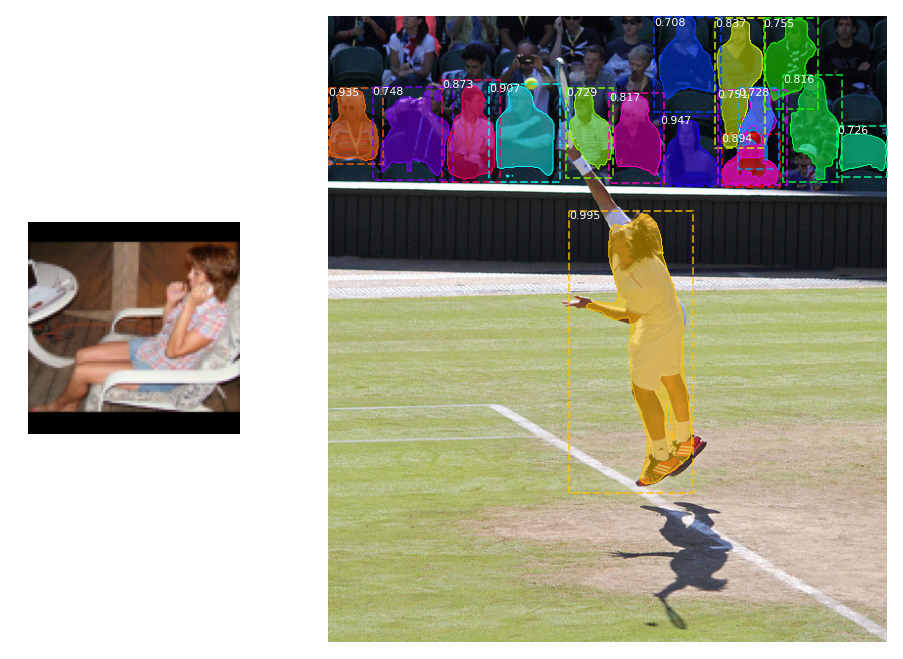

In [23]:
# Select category
category = 1
image_id = np.random.choice(coco_val.category_image_index[category])   
# Load target
target = siamese_utils.get_one_target(category, coco_val, config)
# Load image
image = coco_val.load_image(image_id)
print("image_id", image_id)


# Run detection
results = model.detect([[target]], [image], verbose=1)
r = results[0]
# Display results
siamese_utils.display_results(target, image, r['rois'], r['masks'], r['class_ids'], r['scores'])

### Test image

In [28]:
image = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/image/0637-536-bo-bai-tay-double-K-2.jpg')

In [30]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/target/target1.png')
resized = cv2.resize(img, (96,96), interpolation = cv2.INTER_AREA)
cv2.imwrite('target.jpg', resized)

True

In [31]:
target = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/target.jpg')

Processing 1 images
image                    shape: (600, 600, 3)         min:    0.00000  max:  255.00000  uint8
target                   shape: (1, 1, 96, 96, 3)     min:   11.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -122.70000  max:  151.10000  float64
molded_targets           shape: (1, 1, 96, 96, 3)     min:   11.00000  max:  255.00000  uint8
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


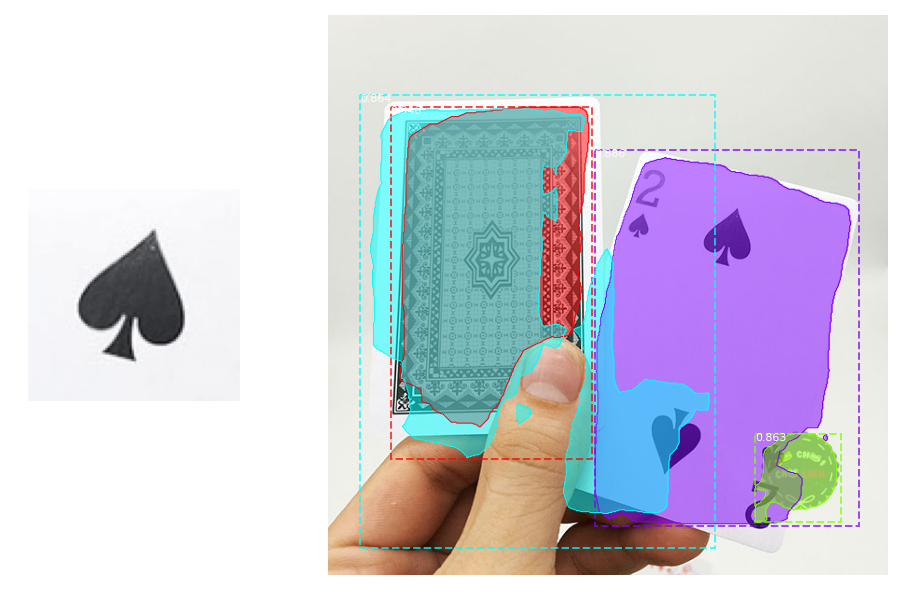

In [32]:
# Run detection
results = model.detect([[target]], [image], verbose=1)
r = results[0]
# Display results
siamese_utils.display_results(target, image, r['rois'], r['masks'], r['class_ids'], r['scores'])

Processing 1 images
image                    shape: (410, 618, 3)         min:    0.00000  max:  255.00000  uint8
target                   shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  247.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
molded_targets           shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  247.00000  uint8
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


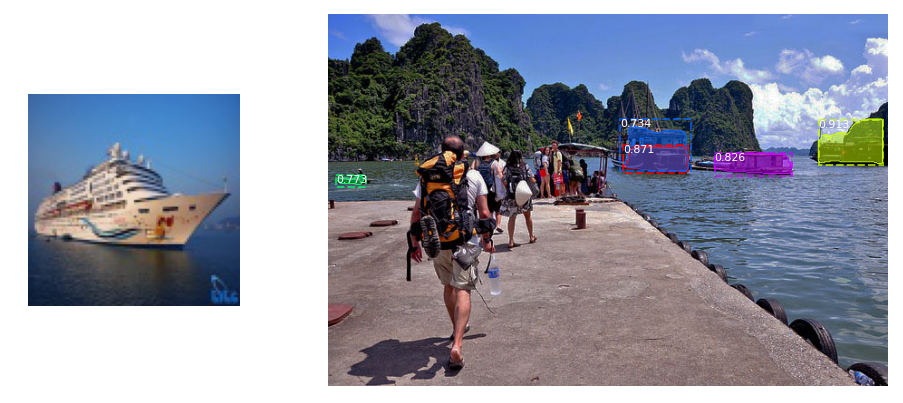

In [41]:
image = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/image/tu-a-den-z-chi-tiet-gia-tham-quan-vinh-ha-long2.jpg')

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/target/tau-bien-6-trieu.jpg')
resized = cv2.resize(img, (96,96), interpolation = cv2.INTER_AREA)
cv2.imwrite('target.jpg', resized)
target = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/target.jpg')

# Run detection
results = model.detect([[target]], [image], verbose=1)
r = results[0]
# Display results
siamese_utils.display_results(target, image, r['rois'], r['masks'], r['class_ids'], r['scores'])

Processing 1 images
image                    shape: (410, 618, 3)         min:    0.00000  max:  255.00000  uint8
target                   shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
molded_targets           shape: (1, 1, 96, 96, 3)     min:    0.00000  max:  255.00000  uint8
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


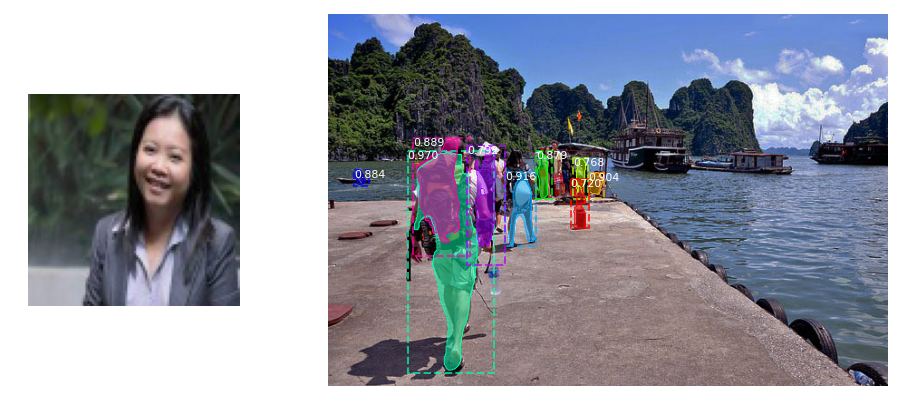

In [42]:
image = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/image/tu-a-den-z-chi-tiet-gia-tham-quan-vinh-ha-long2.jpg')

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/images_test/target/images.jpeg')
resized = cv2.resize(img, (96,96), interpolation = cv2.INTER_AREA)
cv2.imwrite('target.jpg', resized)
target = skimage.io.imread('/content/drive/MyDrive/Colab Notebooks/Siamese Mask_RCNN/target.jpg')

# Run detection
results = model.detect([[target]], [image], verbose=1)
r = results[0]
# Display results
siamese_utils.display_results(target, image, r['rois'], r['masks'], r['class_ids'], r['scores'])